# Ensemble skill verification for km-scale hourly precipitation forecasts

In [13]:
# Imports
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../python_scripts/')
import helpers as h

ATTENTION: You are using a very early, definitely not bug-free netCDF version of getfobj. Please report bugs to s.rasp@lmu.de or fix them ;)


In [24]:
# Setup
sns.set_style('dark')
sns.set_context('talk')
plt.rcParams['figure.figsize'] = (12, 7)

## Load and visualize example data

In [34]:
data_dir = '/project/meteo/w2w/A6/S.Rasp/kenda_psp_data/save/'
date_str = '20160606000000'
radar_fn = data_dir + 'radar/prec_fields/radar_' + date_str + '.npy'

In [44]:
radar_fields = np.load(radar_fn)
radar_fields.shape   # [time, je, ie]

(24, 461, 421)

In [45]:
ref_fn = data_dir + 'DA_REF/prec_fields/ens_' + date_str + '.npy'
tl500_fn = data_dir + 'DA_REF_TL500/prec_fields/ens_' + date_str + '.npy'

In [46]:
ref_fields = np.load(ref_fn)
tl500_fields = np.load(tl500_fn)
ref_fields.shape, tl500_fields.shape   # [time, ens, je, ie]

((24, 20, 461, 421), (24, 20, 461, 421))

In [47]:
raw_radar_fields = np.copy(radar_fields)

In [48]:
radar_fields, ref_fields = h.handle_nans(radar_fields, ref_fields, 100.)

In [49]:
radar_fields, tl500_fields = h.handle_nans(raw_radar_fields, tl500_fields, 100.)

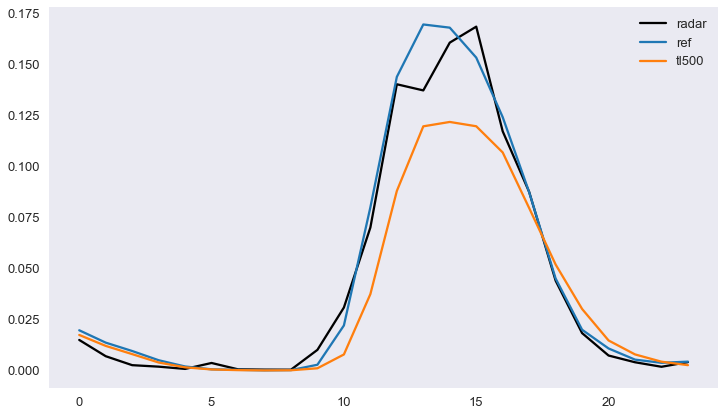

In [50]:
# Visualize total precipitation amount
plt.plot(np.nanmean(radar_fields, axis=(1, 2)), c='k', label='radar')
plt.plot(np.nanmean(ref_fields, axis=(1, 2, 3)), label='ref')
plt.plot(np.nanmean(tl500_fields, axis=(1, 2, 3)), label='tl500')
plt.legend()
plt.show()

## Look at fields

In [51]:
time = 14 #UTC

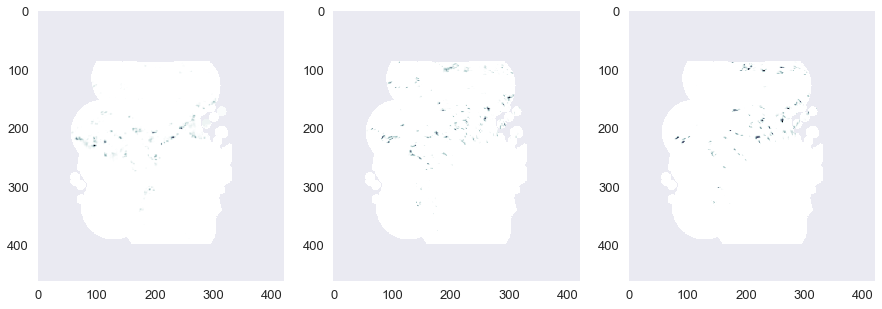

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(15, 7))
axes[0].imshow(radar_fields[time - 1], cmap='bone_r')
axes[1].imshow(ref_fields[time - 1, 0], cmap='bone_r')
axes[2].imshow(tl500_fields[time - 1, 0], cmap='bone_r')

In [55]:
thresh = 1.

In [81]:
mask = np.isnan(radar_fields)
bin_radar = np.array(radar_fields > thresh, dtype=float)
ref_prob = np.mean((ref_fields > thresh), axis=1)
tl500_prob = np.mean((tl500_fields > thresh), axis=1)
bin_radar[mask] = np.nan
ref_prob[mask] = np.nan
tl500_prob[mask] = np.nan

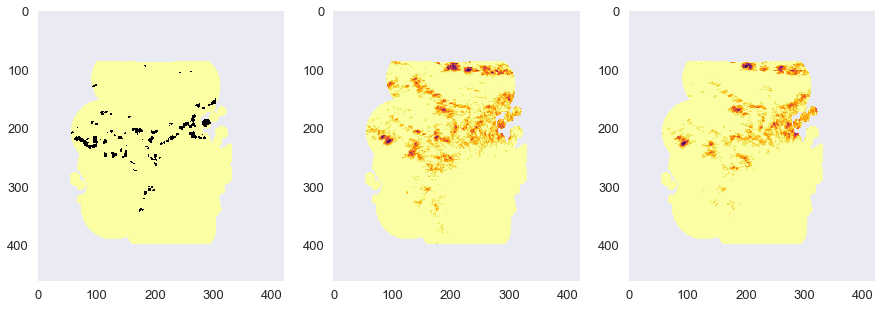

In [83]:
fig, axes = plt.subplots(1, 3, figsize=(15, 7))
axes[0].imshow(bin_radar[time - 1], cmap='inferno_r')
axes[1].imshow(ref_prob[time - 1], cmap='inferno_r')
axes[2].imshow(tl500_prob[time - 1], cmap='inferno_r')

In [84]:
# Squred error
ref_se = (ref_prob - bin_radar) ** 2
tl500_se = (tl500_prob - bin_radar) ** 2

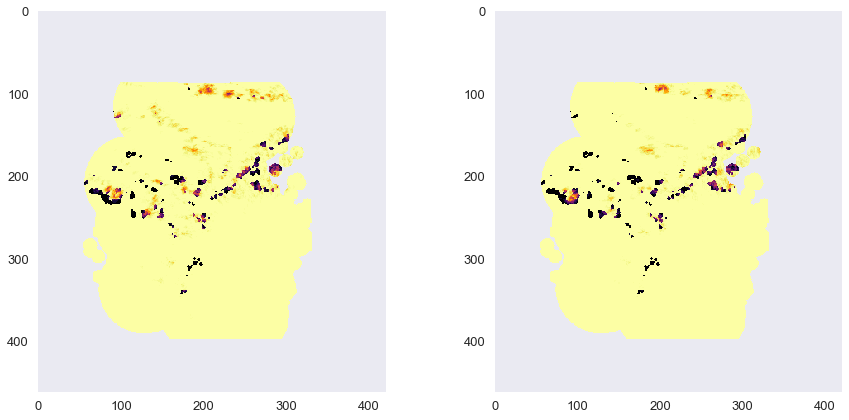

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].imshow(ref_se[time - 1], cmap='inferno_r')
axes[1].imshow(tl500_se[time - 1], cmap='inferno_r')

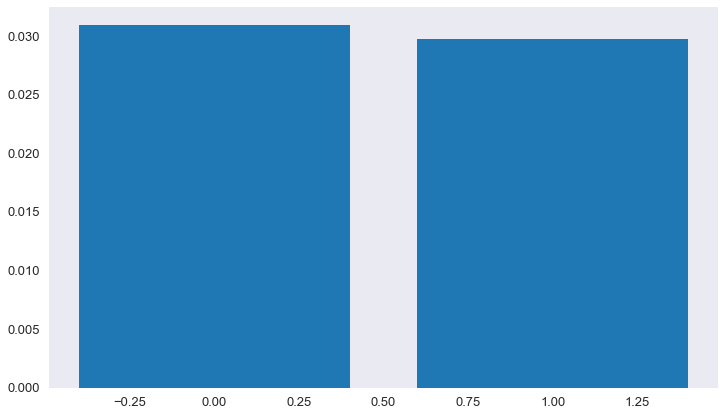

In [86]:
plt.bar([0, 1], [np.nanmean(ref_se, axis=(1,2))[time - 1], 
                 np.nanmean(tl500_se, axis=(1,2))[time - 1]])
plt.show()

In [87]:
# Error where its raining
ref_se_rain = ((ref_prob - bin_radar) ** 2)[time - 1][bin_radar[time - 1] > 0]
tl500_se_rain = ((tl500_prob - bin_radar) ** 2)[time - 1][bin_radar[time - 1] > 0]

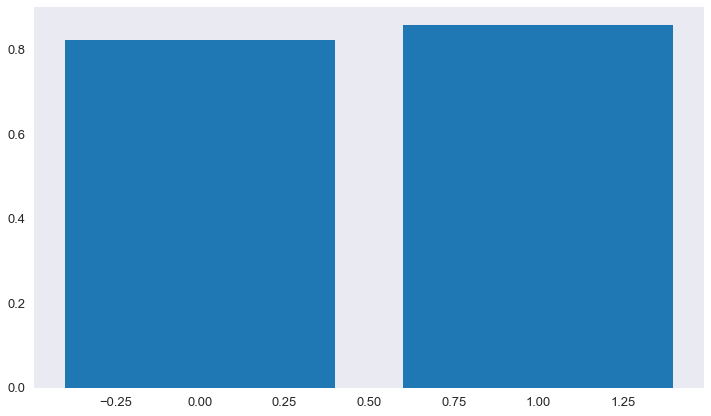

In [88]:
plt.bar([0, 1], [np.nanmean(ref_se_rain), 
                 np.nanmean(tl500_se_rain)])
plt.show()

In [89]:
scale = 31
ref_prob_up = h.upscale_fields(ref_prob, scale)
tl500_prob_up = h.upscale_fields(tl500_prob, scale)
bin_radar_up = h.upscale_fields(bin_radar, scale)

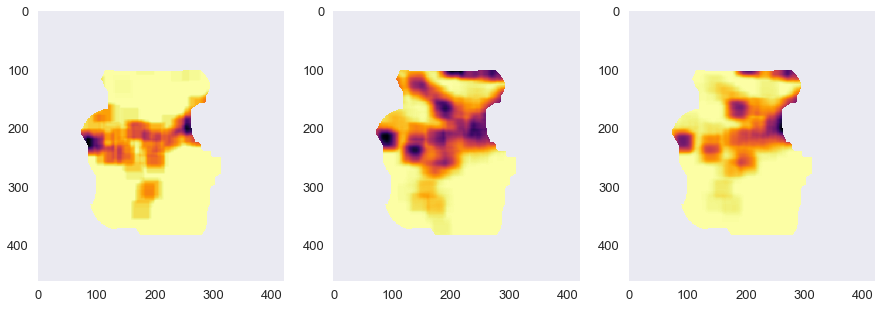

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(15, 7))
axes[0].imshow(bin_radar_up[time - 1], cmap='inferno_r')
axes[1].imshow(ref_prob_up[time - 1], cmap='inferno_r')
axes[2].imshow(tl500_prob_up[time - 1], cmap='inferno_r')

In [91]:
ref_se_up = (ref_prob_up - bin_radar_up) ** 2
tl500_se_up = (tl500_prob_up - bin_radar_up) ** 2

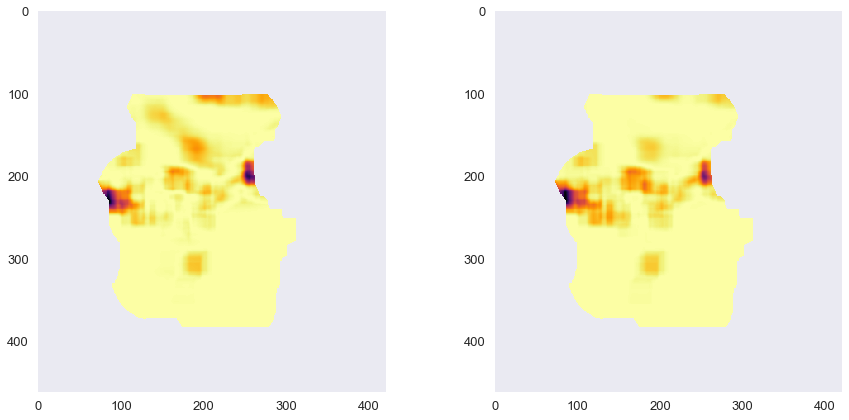

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].imshow(ref_se_up[time - 1], cmap='inferno_r')
axes[1].imshow(tl500_se_up[time - 1], cmap='inferno_r')

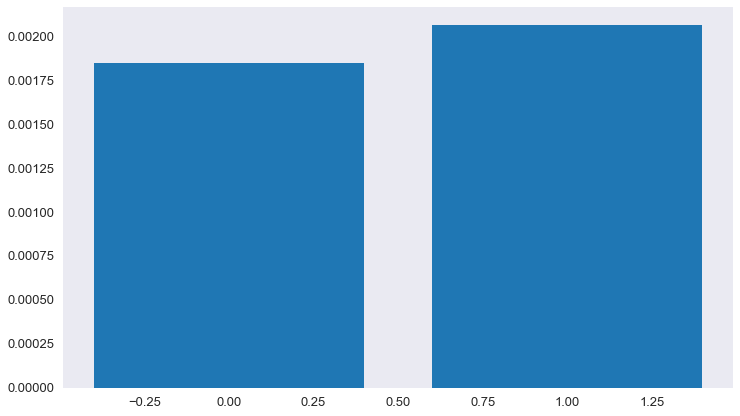

In [94]:
plt.bar([0, 1], [np.nanmean(ref_se_up, axis=(1,2))[time - 1], 
                 np.nanmean(tl500_se_up, axis=(1,2))[time - 1]])
plt.show()